In [1]:
import numpy as np
from matplotlib import pyplot as plt
from time import time
%matplotlib inline
%load_ext line_profiler

In [2]:
from pyqg import qg_model
reload(qg_model)

<module 'pyqg.qg_model' from '/home/rpa/pyqg/pyqg/qg_model.pyc'>

In [3]:
tmax = 104000000
dt = 8000

In [4]:
m = qg_model.QGModel(nx=64, tmax=tmax, dt=dt)
lpo = %lprun -r -f qg_model.QGModel._step_forward -f qg_model.QGModel._forward_timestep m.run()
lpo.print_stats()

# m = qg_model.QGModel(nx=64, tmax=tmax, dt=dt, use_fftw=True)
# lpo = %lprun -r -f qg_model.QGModel._step_forward m.run()
# lpo.print_stats()

t=         8000000, tc=      1000: cfl=0.012988, ke=0.000000424
t=        16000000, tc=      2000: cfl=0.012991, ke=0.000000895
t=        24000000, tc=      3000: cfl=0.013028, ke=0.000002283
t=        32000000, tc=      4000: cfl=0.013089, ke=0.000006549
t=        40000000, tc=      5000: cfl=0.017076, ke=0.000020105
t=        48000000, tc=      6000: cfl=0.029209, ke=0.000064120
t=        56000000, tc=      7000: cfl=0.058157, ke=0.000203661
t=        64000000, tc=      8000: cfl=0.078379, ke=0.000299592
t=        72000000, tc=      9000: cfl=0.088011, ke=0.000450570
t=        80000000, tc=     10000: cfl=0.111697, ke=0.000473758
t=        88000000, tc=     11000: cfl=0.135006, ke=0.000519359
t=        96000000, tc=     12000: cfl=0.106718, ke=0.000484982
Timer unit: 1e-06 s

Total time: 10.968 s
File: /home/rpa/pyqg/pyqg/model.py
Function: _step_forward at line 136

Line #      Hits         Time  Per Hit   % Time  Line Contents
   136                                               de

In [14]:
#tmax = 104000000
dt = 2000
tmax = 1000*dt

m = qg_model.QGModel(nx=512, tmax=tmax, dt=dt)
lpo = %lprun -r -f qg_model.QGModel._step_forward m.run()
lpo.print_stats()

# m = qg_model.QGModel(nx=512, tmax=tmax, dt=dt, use_fftw=True)
# lpo = %lprun -r -f qg_model.QGModel._step_forward m.run()
# lpo.print_stats()

Timer unit: 1e-06 s

Total time: 59.4616 s
File: /home/rpa/pyqg/pyqg/model.py
Function: _step_forward at line 136

Line #      Hits         Time  Per Hit   % Time  Line Contents
   136                                               def _step_forward(self):
   137                                           
   138                                                   # the basic steps are
   139      1000         9923      9.9      0.0          self._print_status() 
   140                                           
   141      1000     20229299  20229.3     34.0          self._invert()
   142                                                   # find streamfunction from pv
   143                                           
   144      1000     21108953  21109.0     35.5          self._do_advection()
   145                                                   # use streamfunction to calculate advection tendency
   146                                                   
   147      1000      1116850  

In [19]:
dt = 2000
tmax = 1000*dt

m = qg_model.QGModel(nx=512, tmax=tmax, dt=dt, ntd=16)
lpo = %lprun -r -f qg_model.QGModel._step_forward m.run()
lpo.print_stats()


Timer unit: 1e-06 s

Total time: 39.8034 s
File: /home/rpa/pyqg/pyqg/model.py
Function: _step_forward at line 136

Line #      Hits         Time  Per Hit   % Time  Line Contents
   136                                               def _step_forward(self):
   137                                           
   138                                                   # the basic steps are
   139      1000        10000     10.0      0.0          self._print_status() 
   140                                           
   141      1000     13002204  13002.2     32.7          self._invert()
   142                                                   # find streamfunction from pv
   143                                           
   144      1000     13453938  13453.9     33.8          self._do_advection()
   145                                                   # use streamfunction to calculate advection tendency
   146                                                   
   147      1000      1133858  

In [26]:
m = qg_model.QGModel(nx=512, tmax=tmax, dt=dt, ntd=1)
%timeit m.ifft(m.ph); m.fft(m.q)
m = qg_model.QGModel(nx=512, tmax=tmax, dt=dt, ntd=2)
%timeit m.ifft(m.ph); m.fft(m.q)
m = qg_model.QGModel(nx=512, tmax=tmax, dt=dt, ntd=4)
%timeit m.ifft(m.ph); m.fft(m.q)
m = qg_model.QGModel(nx=512, tmax=tmax, dt=dt, ntd=8)
%timeit m.ifft(m.ph); m.fft(m.q)

100 loops, best of 3: 15.9 ms per loop
100 loops, best of 3: 11.6 ms per loop
100 loops, best of 3: 10.1 ms per loop
100 loops, best of 3: 8.75 ms per loop


In [27]:
m = qg_model.QGModel(nx=512, tmax=tmax, dt=dt, ntd=1)
%timeit m._invert()
m = qg_model.QGModel(nx=512, tmax=tmax, dt=dt, ntd=2)
%timeit m._invert()
m = qg_model.QGModel(nx=512, tmax=tmax, dt=dt, ntd=4)
%timeit m._invert()
m = qg_model.QGModel(nx=512, tmax=tmax, dt=dt, ntd=8)
%timeit m._invert()

10 loops, best of 3: 19.9 ms per loop
100 loops, best of 3: 16.8 ms per loop
100 loops, best of 3: 14.3 ms per loop
100 loops, best of 3: 13.3 ms per loop


In [5]:
N = 2**10
print N
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=1)
%timeit m.fft_q_to_qh()
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=2)
%timeit m.fft_q_to_qh()
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=4)
%timeit m.fft_q_to_qh()
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=8)
%timeit m.fft_q_to_qh()

1024
10 loops, best of 3: 24.3 ms per loop
100 loops, best of 3: 12.6 ms per loop
100 loops, best of 3: 6.73 ms per loop
100 loops, best of 3: 3.36 ms per loop


In [6]:
N = 2**10
print N
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=1)
%timeit m.ifft_qh_to_q()
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=2)
%timeit m.ifft_qh_to_q()
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=4)
%timeit m.ifft_qh_to_q()
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=8)
%timeit m.ifft_qh_to_q()

1024
10 loops, best of 3: 28.7 ms per loop
100 loops, best of 3: 17.4 ms per loop
100 loops, best of 3: 10.3 ms per loop
100 loops, best of 3: 7.08 ms per loop


In [28]:
N = 2**10
print N
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=1)
%timeit m._invert()
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=2)
%timeit m._invert()
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=4)
%timeit m._invert()
m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=8)
%timeit m._invert()

1024
10 loops, best of 3: 99.7 ms per loop
10 loops, best of 3: 70.9 ms per loop
10 loops, best of 3: 62.6 ms per loop
10 loops, best of 3: 54.1 ms per loop


In [8]:
## the model main loop, want to test each piece
# self._invert()
# # find streamfunction from pv

# self._do_advection()
# # use streamfunction to calculate advection tendency

# self._do_friction()
# # apply friction 

# self._do_external_forcing()
# # apply external forcing

# self._calc_diagnostics()
# # do what has to be done with diagnostics

# self._forward_timestep()

steps = ['invert', 'do_advection', 'do_friction', 'calc_diagnostics', 'forward_timestep']
res = {}
pows_of_two = range(5,11)
num_threads = [1,2,4,8]
for s in steps:
    res[s] = np.zeros((len(pows_of_two), len(num_threads)))

nloops = 200
for j, pow2 in enumerate(pows_of_two):
    N = 2**pow2
    for i, ntd in enumerate(num_threads):
        m = qg_model.QGModel(nx=N, tmax=tmax, dt=dt, ntd=ntd)

        
        print N, ntd
        
        tic = time()
        for n in xrange(nloops):
            m._invert()
        toc = time() - tic
        res['invert'][j,i] = toc / nloops
        
        tic = time()
        for n in xrange(nloops):
            m._do_advection()
        toc = time() - tic
        res['do_advection'][j,i] = toc / nloops
        
        tic = time()
        for n in xrange(nloops):
            m._do_friction()
        toc = time() - tic
        res['do_friction'][j,i] = toc / nloops
        
        tic = time()
        for n in xrange(nloops):
            m._calc_diagnostics()
        toc = time() - tic
        res['calc_diagnostics'][j,i] = toc / nloops
        
        tic = time()
        for n in xrange(nloops):
            m._forward_timestep()
        toc = time() - tic
        res['forward_timestep'][j,i] = toc / nloops

32 1
32 2
32 4
32 8
64 1
64 2
64 4
64 8
128 1
128 2
128 4
128 8
256 1
256 2
256 4
256 8
512 1
512 2
512 4
512 8
1024 1
1024 2
1024 4
1024 8


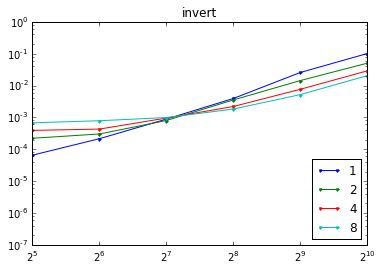

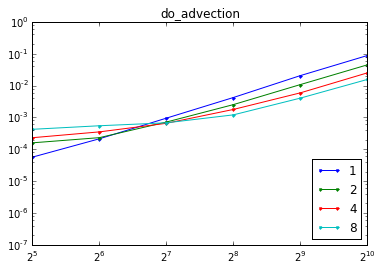

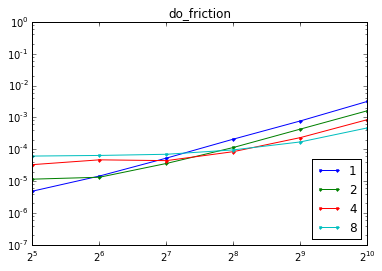

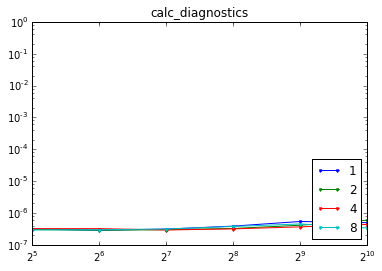

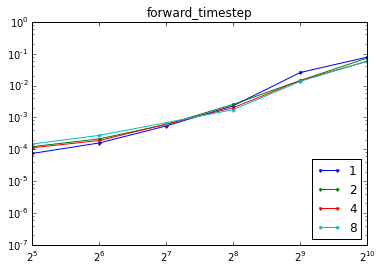

In [9]:
for k in steps:
    plt.figure()
    plt.loglog(np.exp2(pows_of_two), res[k], '.-', basex=2)
    plt.ylim([1e-7,1])
    plt.title(k)
    plt.legend(num_threads, loc='lower right')

In [6]:
m = qg_model.QGModel(nx=2**10, ntd=1)
#m._do_friction()
%timeit m._do_friction()
%timeit m._do_advection()

100 loops, best of 3: 3.23 ms per loop
10 loops, best of 3: 177 ms per loop


In [7]:
m = qg_model.QGModel(nx=2**10, ntd=8)
%timeit m._do_friction()
%timeit m._do_advection()

1000 loops, best of 3: 467 µs per loop
10 loops, best of 3: 25.4 ms per loop


In [10]:
2**3

8